# Sheet9 Leonhard Moske


In [1]:
import numpy as np
import itertools as it
import sympy

def genBasis(L, s): #L number of spins, s total spin
    posSpins = np.linspace(-s, s, int((2*s+1)), dtype = float)#generate List of all possible z projections
    #print("possible Spins ", posSpins)
    tmp = it.product(posSpins, repeat = L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

def Splus(oldcoef, state, site, s): # site counted from 0 , passed with copy
                        # return new coefficient and new state 
    if (state[site] >= s): # if state is s the operator will return 0
        return 0, np.zeros(len(state))
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] + 1)) #calculate new coef
    state[site] = state[site] + 1 # update spin state
    return coef*oldcoef, state 

def Sminus(oldcoef, state, site, s): # analog to Splus
    if (state[site] <= -s ):
        return 0, np.zeros(len(state))
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] - 1))
    state[site] = state[site] - 1
    return coef*oldcoef, state 

def Sz(coef, state, site): 
    return state[site]*coef, state

def HeisenbergHamiltonian(J, statei, L, statej, s):
    H = 0
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei), i+1, s), i, s)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), i+1, s), i, s)
        coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        if np.array_equal(state3, statej):
            H += coef3 * J
    return H

def HeisenbergHamiltonian(J, statei, L, statej, s):
    H = 0
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei), i+1, s), i, s)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), i+1, s), i, s)
        coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        if np.array_equal(state3, statej):
            H += coef3 * J
    return H

def calcMatrix(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i, j in it.product(range(len(Basis)), repeat=2):
        Matrix[i,j] = HeisenbergHamiltonian(J, Basis[i], L, Basis[j], s)
    return Matrix

In [2]:

def genBasis(L, s): #L number of spins, s total spin
    posSpins = np.linspace(-s, s, int((2*s+1)), dtype = float)#generate List of all possible z projections
    #print("possible Spins ", posSpins)
    tmp = it.product(posSpins, repeat = L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

def Splus(oldcoef, state, site): # site counted from 0 , passed with copy
                        # return new coefficient and new state 
    if (state[site] == 0.5): #s): # if state is s the operator will return 0
        return 0, np.zeros(L)
    # coef = 1  #s = 1/2 #coef = np.sqrt(s*(s+1) - state[site] * (state[site] + 1)) #calculate new coef
    state[site] = 0.5 #state[site] + 1 # update spin state
    return oldcoef, state 

def Sminus(oldcoef, state, site): # analog to Splus
    if (state[site] == -0.5): # -s ):
        return 0, np.zeros(L)
    # coef = 1 #coef = np.sqrt(s*(s+1) - state[site] * (state[site] - 1))
    state[site] = -0.5 # state[site] - 1
    return oldcoef, state #coef*oldcoef 

def Sz(coef, state, site): 
    return state[site]*coef, state

def Hamiltonian(J, statei, L, statej, s):
    H = 0
    # if (np.array_equal(statei, statej)): # is in HamiltonianDiag
    #     for i in range(L):
    #         H += statei[i]*statei[(i+1)%L] * J
            #H += Sz(*Sz(1, np.copy(statei), (i+1)%L), i)[0] * J
    for i in range(L): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei),(i+1)%L), i)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), (i+1)%L), i)
        #coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        #if np.array_equal(state3, statej):
        #    H += coef3 * J
    return H

def HamiltonianOpen(J, statei, L, statej, s):
    H = 0
    # if (np.array_equal(statei, statej)): # is in HamiltonianDiag
    #     for i in range(L):
    #         H += statei[i]*statei[(i+1)%L] * J
            #H += Sz(*Sz(1, np.copy(statei), (i+1)%L), i)[0] * J
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei),(i+1)%L), i)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), (i+1)%L), i)
        #coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        #if np.array_equal(state3, statej):
        #    H += coef3 * J
    return H

def HamiltonianDiag(J, statei, L):
    H = 0
    for i in range(L):
        H += statei[i]*statei[(i+1)%L] * J
    return H

def HamiltonianDiagOpen(J, statei, L):
    H = 0
    for i in range(L-1):
        H += statei[i]*statei[(i+1)%L] * J
    return H


def calcMatrix(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiag(J, Basis[i], L)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = Hamiltonian(J, Basis[i], L, Basis[j], s)
    return Matrix 

def calcMatrixOpen(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiagOpen(J, Basis[i], L)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = HamiltonianOpen(J, Basis[i], L, Basis[j], s)
    return Matrix 

def hFields(statei, L, h):
    return np.sum(np.multiply(statei,h))

def calcMatrixOpenWField(Basis, J, L, s, h):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiagOpen(J, Basis[i], L) + hFields(Basis[i], L, h)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = HamiltonianOpen(J, Basis[i], L, Basis[j], s)  
    return Matrix 

In [3]:
L = 10
s = 0.5
J = 1

# calcMatrix(genBasis(L,s), J, L, s)

In [4]:
# ham = calcMatrixOpen(genBasis(L,s), J, L, s)



In [5]:
h = np.random.uniform(low = -0.5,high=0.5,size= L)

ham = calcMatrixOpenWField(genBasis(L,s),J,L,s,h)

1024


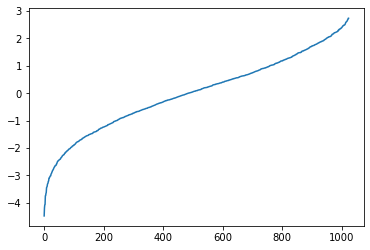

In [6]:
import matplotlib.pyplot as plt
w, v = np.linalg.eig(ham)

print(len(w))
plt.plot(sorted(w))

In [7]:
import itertools as it

def projection(lA, lB, state):
    return np.reshape(state, (2**int(lA),2**int(lB)))


def entropy(state, lA, lB):
    T = projection(lA, lB, state)
    TTev = np.linalg.eigvals(np.matmul(T, np.transpose(T)))
    return - np.sum(np.multiply(np.power(TTev,2), np.log(np.power(TTev,2))))

In [8]:
# print(v[2])
# print(projection(L/2, L/2, v[2]))
print(entropy(v[1], L/2, L/2))

(0.6156423384646856-2.1391615017647675e-61j)


In [9]:
entro = np.array([entropy(eState, L/2, L/2) for eState in v])

/tmp/ipykernel_5748/2008119266.py:10: RuntimeWarning: divide by zero encountered in log
  return - np.sum(np.multiply(np.power(TTev,2), np.log(np.power(TTev,2))))
/tmp/ipykernel_5748/2008119266.py:10: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(np.multiply(np.power(TTev,2), np.log(np.power(TTev,2))))


/usr/lib/python3.10/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 0, 'eigenvalue')

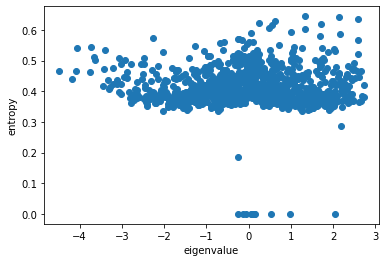

In [10]:
import matplotlib.pyplot as plt

plt.scatter(w, entro)
# plt.ylim((-1,-0.2))
plt.ylabel("entropy")
plt.xlabel("eigenvalue")